# Práctica 3

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Análisis exploratorio

In [2]:
df = pd.read_csv("train_housing_data_italy.csv")
print(df.shape)
df.head()

(213409, 26)


,timestamp,location,title,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,availability,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
0,1.661114e+09,siculiana,"villa unifamiliare via campo spoto 38, siculiana",46000.0,4.0,NaN,85.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,37.338086,13.421996
1,1.661114e+09,strongoli,"quadrilocale contrada tronga 211, tronca, stro...",120000.0,4.0,2.0,190.0,2.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,39.263959,17.052026
2,1.661114e+09,zelbio,"bilocale buono stato, piano terra, zelbio",55000.0,2.0,NaN,85.0,1.0,NaN,not free / other,...,0,1,0,1,0,0,0,0,45.904582,9.180539
3,1.661114e+09,villamagna,"casa colonica, da ristrutturare, 319 m², villa...",130000.0,4.0,NaN,319.0,1.0,NaN,not free / other,...,0,0,0,0,0,0,0,0,42.333295,14.236808
4,1.661114e+09,vallefiorita,"appartamento corso italia, vallefiorita",30000.0,NaN,NaN,143.0,2.0,NaN,not free / other,...,0,0,0,1,0,0,0,0,38.776385,16.461003


In [3]:
df.isnull().sum()

timestamp                   0
location                    0
title                       0
price                   37478
n_rooms                 57848
floor                   69102
mq                       3889
n_bathrooms             13804
year_of_construction       10
availability                0
energy_class              648
status                      0
heating                     0
has_garage                  0
has_terrace                 0
has_garden                  0
has_balcony                 0
has_fireplace               0
has_alarm                   0
has_air_conditioning        0
has_pool                    0
has_parking                 0
has_elevator                0
is_furnished                0
latitude                   60
longitude                  60
dtype: int64

### *Las columnas con valores nulos son:*
- **price** $= 37,478$
- **n_rooms** $= 57,848$
- **floor** $= 69,102$
- **mq** $= 3,889$
- **n_bathrooms** $= 13,804$
- **year_of_construction** $= 10$
- **energy_class** $= 648$
- **latitude** $= 60$
- **longitude** $= 60$


In [4]:
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
213404    False
213405    False
213406    False
213407    False
213408    False
Length: 213409, dtype: bool


In [5]:
print(df.describe())

          timestamp         price        n_rooms          floor  \
count  2.134090e+05  1.759310e+05  155561.000000  144307.000000   
mean   1.661136e+09  2.413253e+05       3.503442       1.820466   
std    1.266113e+04  7.739356e+06       0.985594       1.134597   
min    1.661114e+09  1.000000e+00       2.000000       1.000000   
25%    1.661125e+09  7.700000e+04       3.000000       1.000000   
50%    1.661136e+09  1.350000e+05       3.000000       2.000000   
75%    1.661146e+09  2.350000e+05       4.000000       2.000000   
max    1.661159e+09  2.147484e+09       5.000000      52.000000   

                  mq    n_bathrooms  year_of_construction     has_garage  \
count  209520.000000  199605.000000         213399.000000  213409.000000   
mean      158.692311       1.587751           1965.096462       0.180292   
std       128.708312       0.668113             76.663750       0.384432   
min         1.000000       1.000000           1000.000000       0.000000   
25%        80.00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213409 entries, 0 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             213409 non-null  float64
 1   location              213409 non-null  object 
 2   title                 213409 non-null  object 
 3   price                 175931 non-null  float64
 4   n_rooms               155561 non-null  float64
 5   floor                 144307 non-null  float64
 6   mq                    209520 non-null  float64
 7   n_bathrooms           199605 non-null  float64
 8   year_of_construction  213399 non-null  float64
 9   availability          213409 non-null  object 
 10  energy_class          212761 non-null  object 
 11  status                213409 non-null  object 
 12  heating               213409 non-null  object 
 13  has_garage            213409 non-null  int64  
 14  has_terrace           213409 non-null  int64  
 15  

In [7]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['location', 'title', 'availability', 'energy_class', 'status', 'heating']
Numerical columns : ['timestamp', 'price', 'n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction', 'has_garage', 'has_terrace', 'has_garden', 'has_balcony', 'has_fireplace', 'has_alarm', 'has_air_conditioning', 'has_pool', 'has_parking', 'has_elevator', 'is_furnished', 'latitude', 'longitude']



### Columnas categoricas y numericas del dataset

Numericas | Categoricas
:--: | :--: 
timestamp | location
**price** | title
n_rooms | availability
floor | energy_class
mq | status
n_bathrooms | heating
year_of_construction |
has_garage |
has_terrace |
has_garden |
has_balcony |
has_fireplace |
has_alarm |
has_air_conditioning |
has_pool |
has_parking |
has_elevator |
is_furnished |
latitude |
longitude |

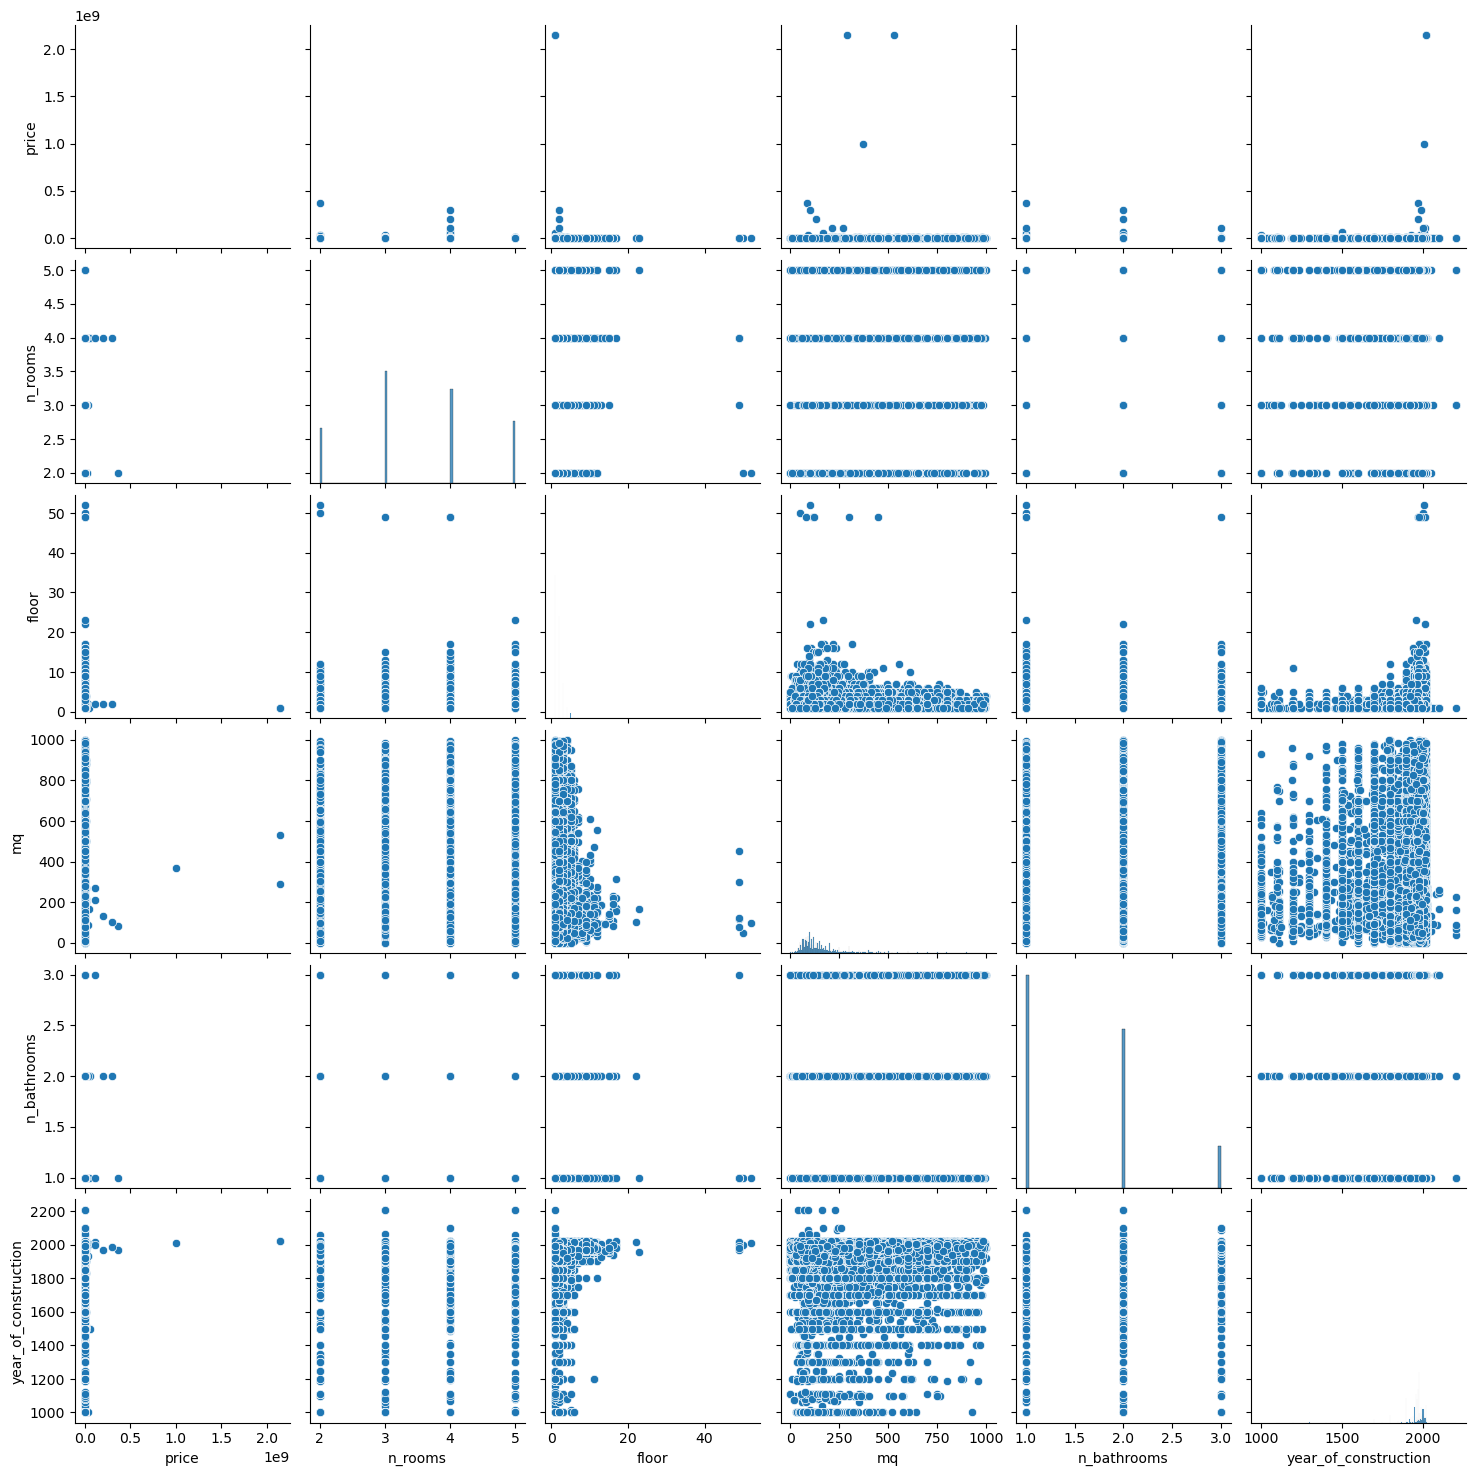

In [9]:
sns.pairplot(df[['price', 'n_rooms', 'floor', 'mq', 'n_bathrooms', 'year_of_construction']])
plt.show()

# Limpieza de datos

In [10]:
# 1. Eliminar las filas donde 'price' es nulo (variable objetivo)
df_cleaned = df.dropna(subset=['price'])
df_cleaned = df_cleaned.dropna(subset=['year_of_construction'])
df_cleaned = df_cleaned.dropna(subset=['floor'])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118799 entries, 10 to 213408
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   timestamp             118799 non-null  float64
 1   location              118799 non-null  object 
 2   title                 118799 non-null  object 
 3   price                 118799 non-null  float64
 4   n_rooms               89661 non-null   float64
 5   floor                 118799 non-null  float64
 6   mq                    117264 non-null  float64
 7   n_bathrooms           112045 non-null  float64
 8   year_of_construction  118799 non-null  float64
 9   availability          118799 non-null  object 
 10  energy_class          118452 non-null  object 
 11  status                118799 non-null  object 
 12  heating               118799 non-null  object 
 13  has_garage            118799 non-null  int64  
 14  has_terrace           118799 non-null  int64  
 15  has_

In [11]:
for col in cat_col:
    print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna location: 7023 subniveles
Columna title: 190951 subniveles
Columna availability: 1 subniveles
Columna energy_class: 12 subniveles
Columna status: 1 subniveles
Columna heating: 2 subniveles


Status no aporta información para diferenciar entre casas.

In [12]:
# 4. Eliminar columnas irrelevantes como 'timestamp', 'title' y status
df_cleaned = df_cleaned.drop(columns=['timestamp', 'title', 'status'])

In [13]:
# Eliminar duplicados
print(f'Tamaño antes de eliminar las filas repetidas: {df_cleaned.shape}')
df_cleaned = df_cleaned.drop_duplicates()
print(f'Tamaño después de eliminar las filas repetidas: {df_cleaned.shape}')
df_cleaned.head()

Tamaño antes de eliminar las filas repetidas: (118799, 23)
Tamaño después de eliminar las filas repetidas: (118096, 23)


,location,price,n_rooms,floor,mq,n_bathrooms,year_of_construction,availability,energy_class,heating,...,has_balcony,has_fireplace,has_alarm,has_air_conditioning,has_pool,has_parking,has_elevator,is_furnished,latitude,longitude
10,zumpano,90000.0,5.0,2.0,124.0,2.0,2002.0,not free / other,e,autonomous,...,0,0,0,0,0,0,0,1,39.310894,16.292094
13,zumpano,59000.0,4.0,3.0,127.0,1.0,2001.0,not free / other,d,autonomous,...,0,1,0,1,0,0,1,0,39.310894,16.292094
15,zafferana etnea,65000.0,2.0,3.0,45.0,1.0,1950.0,not free / other,g,autonomous,...,0,0,0,0,0,0,0,0,37.693285,15.106460
16,zafferana etnea,120000.0,2.0,3.0,45.0,1.0,1900.0,not free / other,g,autonomous,...,0,1,0,0,0,1,0,0,37.693285,15.106460
17,vinchiaturo,22000.0,2.0,3.0,70.0,1.0,1900.0,not free / other,g,autonomous,...,0,0,0,0,0,0,0,0,41.492925,14.590729


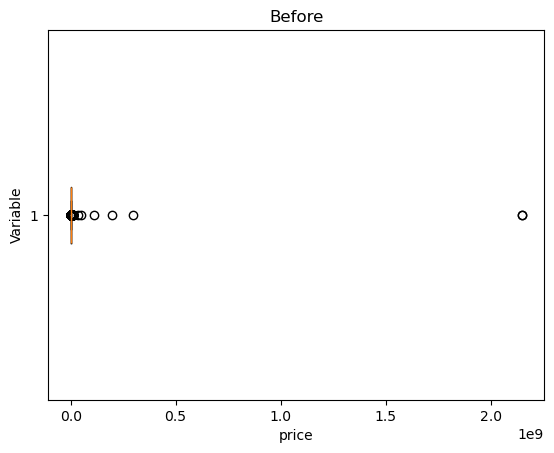

In [14]:
plt.boxplot(df_cleaned['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [15]:
# calculate summary statistics
mean = df_cleaned['price'].mean()
std  = df_cleaned['price'].std()

# Calculate the lower and upper bounds
upper_bound = mean + std*2
 
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df_1 = df_cleaned[df_cleaned['price'] <= upper_bound]

Upper Bound : 18063667.070868418


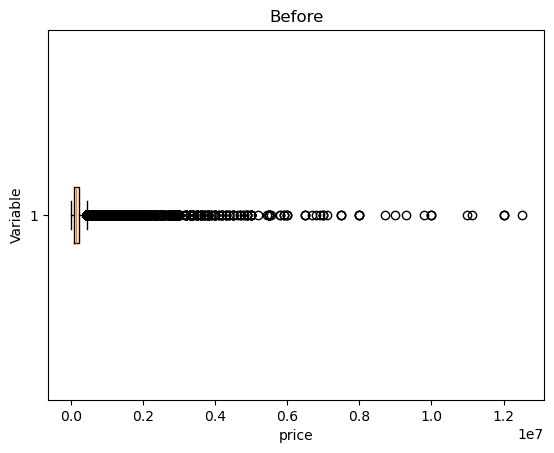

In [16]:
plt.boxplot(df_1['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [17]:
# calculate summary statistics
mean = df_1['price'].mean()
std  = df_1['price'].std()

# Calculate the lower and upper bounds
upper_bound = mean + std*2
 
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df_2 = df_1[df_1['price'] <= upper_bound]

Upper Bound : 796524.6209167758


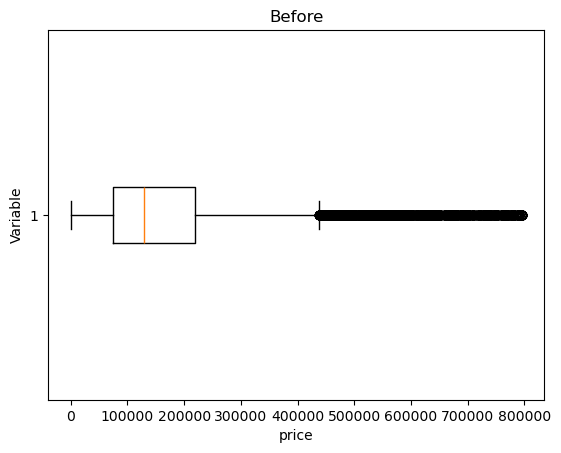

In [18]:
plt.boxplot(df_2['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [19]:
# calculate summary statistics
mean = df_2['price'].mean()
std  = df_2['price'].std()

# Calculate the lower and upper bounds
upper_bound = mean + std*2
 
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df_3 = df_2[df_2['price'] <= upper_bound]

Upper Bound : 438971.1938088956


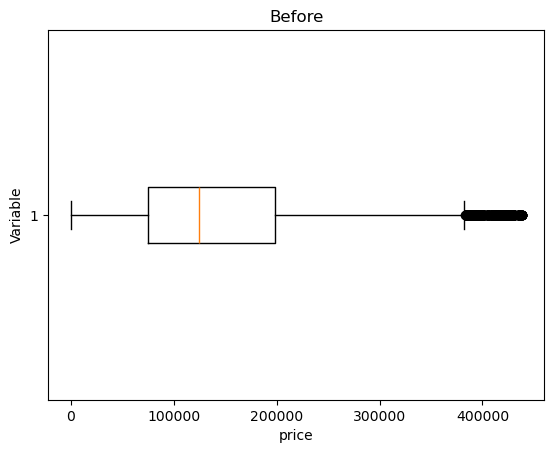

In [20]:
plt.boxplot(df_3['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [21]:
# calculate summary statistics
mean = df_3['price'].mean()
std  = df_3['price'].std()

# Calculate the lower and upper bounds
upper_bound = mean + std*2
 
print('Upper Bound :',upper_bound)
 
# Drop the outliers
df_4 = df_3[df_3['price'] <= upper_bound]

Upper Bound : 335151.3066618624


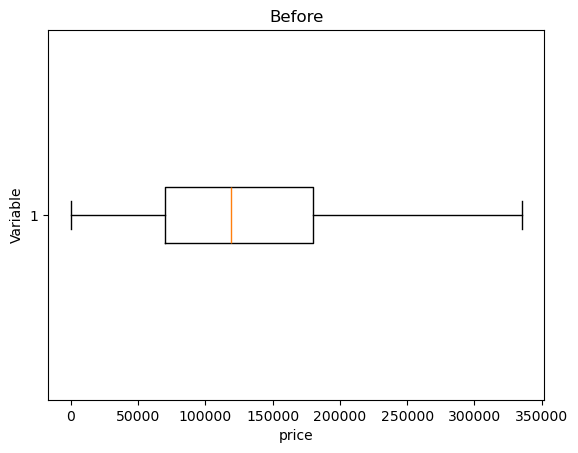

In [22]:
plt.boxplot(df_4['price'], vert=False)
plt.ylabel('Variable')
plt.xlabel('price')
plt.title('Before')
plt.show()

In [23]:
# Eliminar filas con 0 en la cantidad de cuartos
df_4 = df_4[df_4['n_rooms'] > 0]
print(df_4.shape)

(82168, 23)


# Reducción de dimensionlidad

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

num_col.remove('price')
num_col.remove('timestamp')

df_4.dropna(inplace=True)

X = df_4[[num for num in num_col]].values
y = df_4['price'].values

print(len(y))
print(len(X))

print(y)
print(X)

81135
81135
[ 90000.  59000.  65000. ... 130000. 210000. 220000.]
[[  5.          2.        124.        ...   1.         39.310894
   16.292094 ]
 [  4.          3.        127.        ...   0.         39.310894
   16.292094 ]
 [  2.          3.         45.        ...   0.         37.6932846
   15.1064599]
 ...
 [  4.          1.        190.        ...   0.         41.1257843
   16.8620293]
 [  3.          1.         80.        ...   0.         41.1257843
   16.8620293]
 [  3.          4.        111.        ...   0.         41.1257843
   16.8620293]]


# PCA

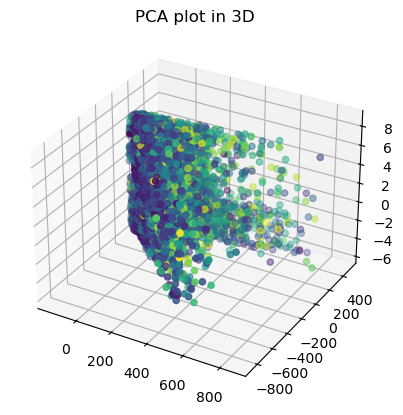

In [25]:
from sklearn.decomposition import PCA

X_PCA = PCA(n_components=3).fit_transform(X)

fig = plt.figure()
ax = plt.axes(projection ="3d")

ax.scatter3D(X_PCA[:,0], X_PCA[:,1], X_PCA[:,2], c=y)
plt.title("PCA plot in 3D")

plt.show()

## LDA

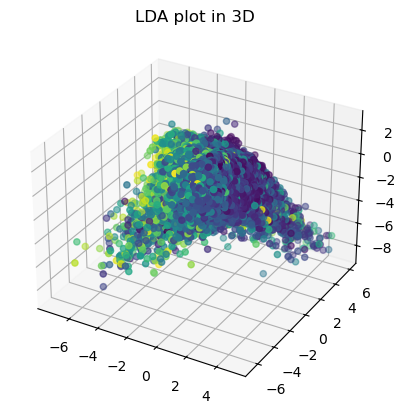

In [26]:
X_LDA = LDA(n_components=3).fit_transform(X,y)

fig = plt.figure()
ax = plt.axes(projection ="3d")

ax.scatter3D(X_LDA[:,0], X_LDA[:,1], X_LDA[:,2], c=y)
plt.title("LDA plot in 3D")
plt.show()

# t-SNE

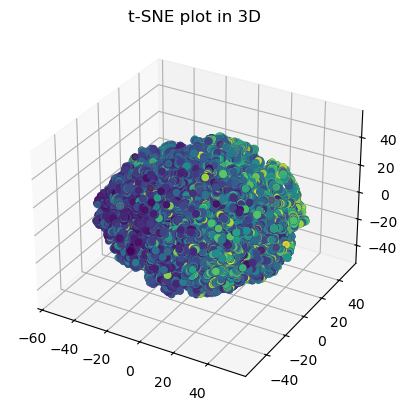

In [25]:
from sklearn.manifold import TSNE

X_TSNE = TSNE(n_components=3,perplexity=10, early_exaggeration=12, learning_rate='auto', init='pca',n_jobs=8).fit_transform(X)

fig = plt.figure()
ax = plt.axes(projection ="3d")

ax.scatter3D(X_TSNE[:,0], X_TSNE[:,1], X_TSNE[:,2], c=y)
plt.title("t-SNE plot in 3D")

plt.show()


# UMAP

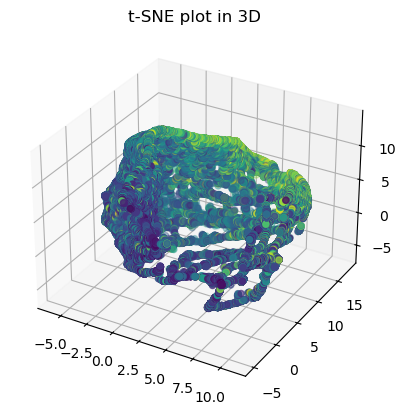

In [26]:
from umap import UMAP

X_UMAP = UMAP(n_components=3).fit_transform(X)

fig = plt.figure()
ax = plt.axes(projection ="3d")

ax.scatter3D(X_UMAP[:,0], X_UMAP[:,1], X_UMAP[:,2], c=y)
plt.title("t-SNE plot in 3D")

plt.show()

# Selección de características

In [29]:
from sklearn.feature_selection import mutual_info_classif

### Applying feature selection method
X_new = mutual_info_classif(X, y)

# plot feature selection
feat_imp = pd.Series(X_new, df_4.columns[0:len(df_4.columns)-1])
feat_imp.plot(kind='barh')
plt.show()

ValueError: Length of values (3) does not match length of index (22)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Applying feature selection method
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# show feature selection
importances = rf.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

plt.figure(figsize=(10, 6))
forest_importances.plot(kind='bar')
plt.title('Feature selection using Random Forest')
plt.show()

In [ ]:
import warnings
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    ### Applying feature selection method
    efs = ExhaustiveFeatureSelector(RandomForestClassifier(), min_features=1, max_features=4) #change max_features
    efs = efs.fit(X, y)

    # show feature selection
    print('The selected features are:', efs.best_feature_names_)

# Modelos de regresión

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

ffs = SequentialFeatureSelector(lr, n_features_to_select='auto', direction='forward')
ffs.fit(X, y2)

# show feature selection
selected_features = ffs.get_support()
print('The selected features are:', list(X.columns[selected_features]))